<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0602_19%EC%9D%BC%EC%B0%A8_pandas(cctv_2%2C_merge)%2Csklearn%ED%9A%8C%EA%B7%80%EC%8B%9D%2C_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cctv = pd.read_csv('cctv.csv',encoding='cp949', skiprows=[0,2],thousands=',', header=[0])

In [ ]:
pop_Seoul = pd.read_table('report.txt', skiprows=[0,1,2,3],names=['gu','gen','total','man','woman','k_total','k_man','k_woman',\
                                                               'f_total','f_man','f_woman','per_gen','65_up'],thousands=',')
pop_Seoul.head()

,gu,gen,total,man,woman,k_total,k_man,k_woman,f_total,f_man,f_woman,per_gen,65_up
2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
2022.1/4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [ ]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2022.1/4 to 2022.1/4
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gu       25 non-null     object 
 1   gen      25 non-null     int64  
 2   total    25 non-null     int64  
 3   man      25 non-null     int64  
 4   woman    25 non-null     int64  
 5   k_total  25 non-null     int64  
 6   k_man    25 non-null     int64  
 7   k_woman  25 non-null     int64  
 8   f_total  25 non-null     int64  
 9   f_man    25 non-null     int64  
 10  f_woman  25 non-null     int64  
 11  per_gen  25 non-null     float64
 12  65_up    25 non-null     int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 2.7+ KB


In [ ]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구분        25 non-null     object 
 1   총계        25 non-null     int64  
 2   2012년 이전  25 non-null     int64  
 3   2012년     24 non-null     float64
 4   2013년     24 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
 10  2019년     25 non-null     int64  
 11  2020년     25 non-null     int64  
 12  2021년     25 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 2.7+ KB


In [ ]:
cctv_data = cctv.loc[:, ['구분', '총계']]

In [ ]:
cctv_data.head()

,구분,총계
0,종로구,1715
1,중 구,2447
2,용산구,2611
3,성동구,3829
4,광진구,3211


In [ ]:
cctv_data.rename(columns={'구분':'gu','총계':'cctv_total'}, inplace=True)

In [ ]:
cctv_data.head()

,gu,cctv_total
0,종로구,1715
1,중 구,2447
2,용산구,2611
3,성동구,3829
4,광진구,3211


In [ ]:
pop_data = pop_Seoul.reset_index(drop=True)

In [ ]:
pop_data.head()

,gu,gen,total,man,woman,k_total,k_man,k_woman,f_total,f_man,f_woman,per_gen,65_up
0,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
3,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [ ]:
pop_data = pop_data.loc[:,['gu','total']]

In [ ]:
pop_data.head(2)

,gu,total
0,종로구,153684
1,중구,131450


In [ ]:
cctv_data.head(2)

,gu,cctv_total
0,종로구,1715
1,중 구,2447


# dataframe 합치기

In [ ]:
data = pd.merge(cctv_data, pop_data, on='gu')#구를 기준으로

In [ ]:
data.head()

,gu,cctv_total,total
0,종로구,1715,153684
1,용산구,2611,236518
2,성동구,3829,291609
3,광진구,3211,353110
4,동대문구,2628,352592


In [ ]:
len(pop_data),len(cctv_data)    #항상 누락된 값이 있는지 확인할 것

(25, 25)

In [ ]:
pop_data.shape

(25, 2)

In [ ]:
pop_data.shape, cctv_data.shape

((25, 2), (25, 2))

In [ ]:
len(data)

24

In [ ]:
gu_list = list(data.gu)

In [ ]:
gu_list

['종로구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [ ]:
for i in pop_data.gu:
    if i in gu_list:
        pass
    else:
        print(i)

중구


In [ ]:
cctv_data.loc[1,'gu']= '중구'   #중구 이름 변경

In [ ]:
cctv_data.head(2)

,gu,cctv_total
0,종로구,1715
1,중구,2447


In [ ]:
data= pd.merge(cctv_data, pop_data , on= 'gu')

In [ ]:
len(data)

25

# 2

sklearn 이용하여 회귀식 구하기

In [ ]:
from sklearn.linear_model import LinearRegression

입력 데이터를 2차원 배열로! sklearn 의 독립변수는 항상 2차원 배열로 입력하게 되어있다.!!

In [ ]:
data.head()

,gu,cctv_total,total
0,종로구,1715,153684
1,중구,2447,131450
2,용산구,2611,236518
3,성동구,3829,291609
4,광진구,3211,353110


In [ ]:
data.total.shape

(25,)

In [ ]:
data.shape

(25, 3)

In [ ]:
x = data.total.values.reshape(25,-1)

In [ ]:
x.shape

(25, 1)

In [ ]:
x.ndim  #차원을 알려주는 메서드

2

In [ ]:
data.total  #pandas Series객체

In [ ]:
data.total[:, np.newaxis]

In [ ]:
data.total.values[:, np.newaxis]

In [ ]:
a = np.arange(4)

In [ ]:
a

array([0, 1, 2, 3])

In [ ]:
a[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3]])

In [ ]:
a[:, np.newaxis].shape

(4, 1)

In [ ]:
a[:, None]

array([[0],
       [1],
       [2],
       [3]])

In [ ]:
a[np.newaxis, :]

array([[0, 1, 2, 3]])

In [ ]:
a[np.newaxis, :].shape

(1, 4)

In [ ]:
x = data.total.values[:, np.newaxis]

In [ ]:
x.shape

(25, 1)

In [ ]:
y= data.cctv_total

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:
model = LinearRegression() # y = ax+b #클래스의 인스턴스

In [ ]:
model.fit(x,y)  #x와 y를 대입하면 a 와 b값을 구할 수 있다.  #a= x의 계수

LinearRegression()

In [ ]:
model.coef_ #a값    #모델의 attribute속성값

array([0.00406323])

In [ ]:
model.intercept_    #b값

1760.443639188823

In [ ]:
data.head(2)

,gu,cctv_total,total
0,종로구,1715,153684
1,중구,2447,131450


In [ ]:
data['predict_lr'] = model.predict(x)

In [ ]:
data

,gu,cctv_total,total,predict_lr
0,종로구,1715,153684,2384.897831
1,중구,2447,131450,2294.555866
2,용산구,2611,236518,2721.471830
3,성동구,3829,291609,2945.319504
4,광진구,3211,353110,3195.212513
5,동대문구,2628,352592,3193.107758
6,중랑구,3737,393600,3359.732894
7,성북구,4602,442680,3559.156463
8,강북구,3090,300824,2982.762213
9,도봉구,1930,318100,3052.958659


predict(x) = total

잔차 = 예측한 수치보다 높거나 낮은 길이값

위로 올라가면 양수, 내려가면 음수

오차 구하는 법

In [ ]:
data['res']=data.cctv_total- data.predict_lr

In [ ]:
data

,gu,cctv_total,total,predict_lr,res
0,종로구,1715,153684,2384.897831,-669.897831
1,중구,2447,131450,2294.555866,152.444134
2,용산구,2611,236518,2721.471830,-110.471830
3,성동구,3829,291609,2945.319504,883.680496
4,광진구,3211,353110,3195.212513,15.787487
5,동대문구,2628,352592,3193.107758,-565.107758
6,중랑구,3737,393600,3359.732894,377.267106
7,성북구,4602,442680,3559.156463,1042.843537
8,강북구,3090,300824,2982.762213,107.237787
9,도봉구,1930,318100,3052.958659,-1122.958659


In [ ]:
data_sort=data.sort_values(by='res',ascending=False)

결과값 index재설정

In [ ]:
data_sort = data_sort.reset_index(drop=True)

In [ ]:
data_sort.head()

,gu,cctv_total,total,predict_lr,res
0,강남구,6871,537338,3943.774152,2927.225848
1,관악구,5149,500336,3793.426334,1355.573666
2,구로구,4608,419984,3466.937284,1141.062716
3,성북구,4602,442680,3559.156463,1042.843537
4,성동구,3829,291609,2945.319504,883.680496


**그래프 그리기**

figure = (10,8)크기의 종이

In [ ]:
from matplotlib import font_manager
font_path = 'IropkeBatangM.woff'
fontprop = font_manager.FontProperties(fname=font_path, size=15)

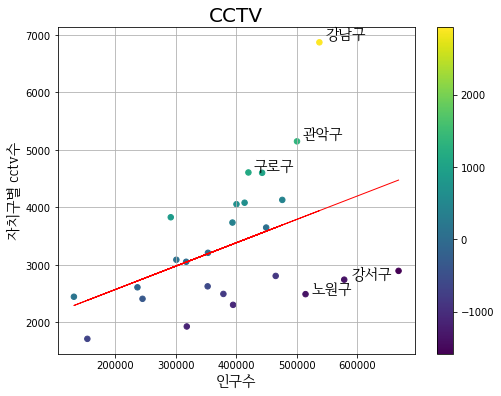

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data_sort.total, data_sort.cctv_total,c=data_sort.res, s=30)    #x는 인구 토탈, y는 cctv토탈 s =사이즈(비율)
#3위까지 그래프에 표시
for n in range(3):
    plt.text(data_sort.loc[n, 'total']*1.02, data_sort.loc[n, 'cctv_total']*1.01,   \
             data_sort.loc[n, 'gu'], fontsize=15, fontproperties = fontprop)
for n in range(22,24):
    plt.text(data_sort.loc[n, 'total']*1.02, data_sort.loc[n, 'cctv_total']*1.01,   \
             data_sort.loc[n, 'gu'], fontsize=15, fontproperties = fontprop)
plt.plot(data_sort.total, data_sort.predict_lr, lw = 1, color='r')  #가운데 선그리기 ( )
plt.xlabel('인구수',fontproperties = fontprop)
plt.ylabel('자치구별 cctv수', fontproperties=fontprop)
plt.title('CCTV', fontsize=20)
plt.colorbar()
plt.grid()  #칸 만들기
#%matplotlib inline 입력이 안될경우(spyder나 powershell)
plt.show()
#저장
plt.savefig('test.png')

# 4

**Matplotlib 그래프 분류**

matplotlib 는 아래와 같이 크게 두가지 방법으로 사용할 수 있습니다.
- stateless API (objected-based)
서버가 클라이언트 상태를 신경쓰는것
버거킹에서 버거, 감자튀김, 콜라 등 다 필요한지 물어보는거와 같음
- staeful API (state-based)

stateless방법은 내가 지정한 figure,내가 지정한 ax에 그림을 그리는 방법이고.

stateful방법은 현재의 figure, 현재의 ax에 그림을 그리는 방법입니다. 
- figure : 그래프를 그릴 공간(종이) / ax(axes): 그 공간 중 지금 내가 사용할부분

따라서 stateless 방법은 figure와 ax를 직접 만들어야하고 , 이런 특징으로 객체지향적이라고 할 수 있다.

반면 stateful 방법은 직접 지정하지 않고, 현재의 figure와 ax를 자동으로 찾아 그곳에 plotting하는 방식입니다. 

In [ ]:
x = np.arange(10)
y = x*2

In [ ]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
y

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
fig = plt.figure()      #>>>syntaxsugar방식
axes = fig.add_axes()

<Figure size 432x288 with 0 Axes>

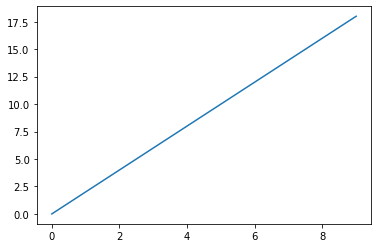

In [ ]:
fig,axes = plt.subplots()
axes.plot(x,y)

stateless하게 그림

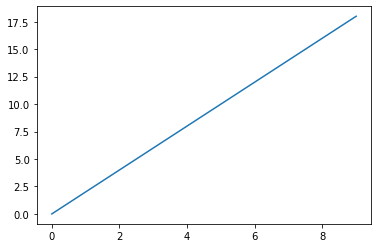

In [ ]:
plt.plot(x,y)

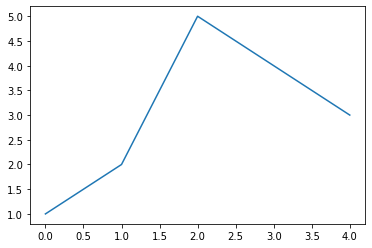

In [ ]:
plt.plot([1,2,5,4,3])

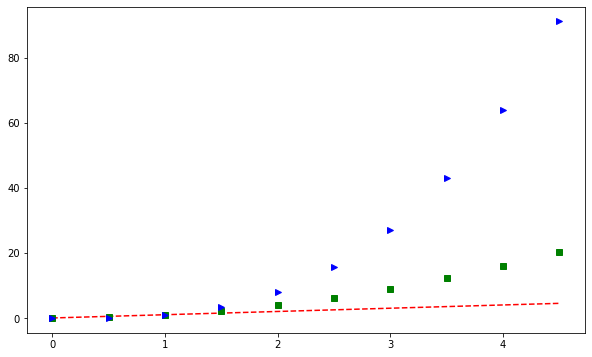

In [ ]:
t = np.arange(0,5,0.5)
plt.figure(figsize=(10,6))
plt.plot(t,t,'r--')
plt.plot(t,t**2,'gs')
plt.plot(t,t**3,'b>')
plt.show()

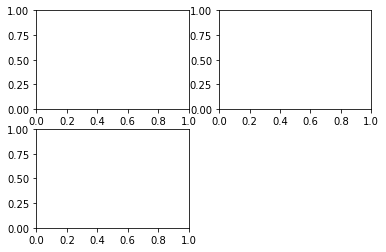

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)